In [218]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [219]:
def the_cross(a, b, c, d, e, f, g, h, i, j):
    ab = np.cross(a, b)
    cd = np.cross(c, d)
    abcde = np.cross(np.cross(ab, cd), e)
    fg = np.cross(f, g)
    hi = np.cross(h, i)
    fghij = np.cross(np.cross(fg, hi), j)
    return np.cross(abcde, fghij)

def to_pixel_coords(x):
    return np.round(x/x[-1])

    

In [220]:
all_points_left = [ [818, 110, 1],
                    [952, 157, 1],
                    [993, 125, 1],
                    [857, 79,  1],
                    [797, 312, 1],
                    [908, 360, 1],
                    [949, 322, 1],
                    [-1, -1,  -1],
                    [323, 342, 1],
                    [453, 368, 1],
                    [509, 270, 1],
                    [389, 252, 1],
                    [365, 561, 1],
                    [479, 584, 1],
                    [528, 488, 1],
                    [-1, -1,  -1],
                    [138, 553, 1],
                    [437, 755, 1],
                    [819, 386, 1],
                    [547, 257, 1],
                    [174, 656, 1],
                    [445, 862, 1],
                    [805, 448, 1],
                    [-1, -1,  -1]]

all_points_right = [[911,  446, 1],
                    [811,  555, 1],
                    [919,  612, 1],
                    [1013, 490, 1],
                    [-1, -1,  -1],
                    [773, 776, 1],
                    [865,  823, 1],
                    [958, 700, 1],
                    [298,  75,  1],
                    [251, 121, 1],
                    [369, 139, 1],
                    [414, 87,  1],
                    [-1, -1,  -1],
                    [289, 327, 1],
                    [398, 342, 1],
                    [435, 289, 1],
                    [-1, -1,  -1],
                    [142, 320, 1],
                    [523, 526, 1],
                    [738, 344, 1],
                    [-1, -1,  -1],
                    [161, 425, 1],
                    [530, 641, 1],
                    [736, 454, 1]]

all_points_zipped  = list(zip(all_points_left, all_points_right))
used_points_zipped = list(filter(lambda pair: pair[0][0] != -1 and pair[1][0] != -1, all_points_zipped))
used_points_left   = [a for a, b in used_points_zipped]
used_points_right  = [b for a, b in used_points_zipped]
used_points_left = np.array(used_points_left)
used_points_right = np.array(used_points_right)

all_points_left = np.array([np.array(p, dtype='float32') for p in all_points_left])
all_points_right = np.array([np.array(p, dtype='float32') for p in all_points_right])

# pointsleft, pointsright - uparene tacke
points_left = [all_points_left[0],
               all_points_left[1],
               all_points_left[2],
               all_points_left[3],
               all_points_left[5],
               all_points_left[6],
               all_points_left[8],
               all_points_left[9]]

points_right = [all_points_right[0],
               all_points_right[1],
               all_points_right[2],
               all_points_right[3],
               all_points_right[5],
               all_points_right[6],
               all_points_right[8],
               all_points_right[9]]
points_left = np.array(points_left)
points_right = np.array(points_right)

# jos treba naci nevidljive tacke
# za levu sliku to su x[7], x[15], x[23]
# np.cross(np.cross( ), points_left[3])


all_points_left[7] = to_pixel_coords(
                    the_cross(all_points_left[0],
                    all_points_left[4],
                    all_points_left[1],
                    all_points_left[5],
                    all_points_left[3],
                    all_points_left[0],
                    all_points_left[3],
                    all_points_left[1],
                    all_points_left[2],
                    all_points_left[4])
                    )
all_points_left[15] = to_pixel_coords(
                  the_cross(all_points_left[8],
                  all_points_left[12],
                  all_points_left[9],
                  all_points_left[13],
                  all_points_left[11],
                  all_points_left[8],
                  all_points_left[11],
                  all_points_left[9],
                  all_points_left[10],
                  all_points_left[12]))

all_points_left[23] = to_pixel_coords(
                  the_cross(all_points_left[16],
                  all_points_left[20],
                  all_points_left[17],
                  all_points_left[21],
                  all_points_left[19],
                  all_points_left[16],
                  all_points_left[19],
                  all_points_left[17],
                  all_points_left[18],
                  all_points_left[20]))

# za desnu sliku to su y[4], y[12], y[16], y[20]
all_points_right[4] = to_pixel_coords(
                  the_cross(all_points_right[1],
                  all_points_right[5],
                  all_points_right[2],
                  all_points_right[6],
                  all_points_right[0],
                  all_points_right[1],
                  all_points_right[0],
                  all_points_right[2],
                  all_points_right[3],
                  all_points_right[5]))

all_points_right[12] = to_pixel_coords(
                  the_cross(all_points_right[9],
                  all_points_right[13],
                  all_points_right[10],
                  all_points_right[14],
                  all_points_right[8],
                  all_points_right[9],
                  all_points_right[8],
                  all_points_right[10],
                  all_points_right[11],
                  all_points_right[13]))

all_points_right[16] = np.array([362, 199, 1])
all_points_right[20] = to_pixel_coords(
                  the_cross(all_points_right[17],
                  all_points_right[21],
                  all_points_right[18],
                  all_points_right[22],
                  all_points_right[16],
                  all_points_right[17],
                  all_points_right[16],
                  all_points_right[18],
                  all_points_right[19],
                  all_points_right[21]))





In [221]:
print('LEVA \t--> DESNA: ', '==================================', sep='\n')
print('\n'.join([f'{(a[0], a[1], a[2])} \t--> {(b[0], b[1], b[2])}' for a, b in zip(points_left, points_right)]))


LEVA 	--> DESNA: 
(818.0, 110.0, 1.0) 	--> (911.0, 446.0, 1.0)
(952.0, 157.0, 1.0) 	--> (811.0, 555.0, 1.0)
(993.0, 125.0, 1.0) 	--> (919.0, 612.0, 1.0)
(857.0, 79.0, 1.0) 	--> (1013.0, 490.0, 1.0)
(908.0, 360.0, 1.0) 	--> (773.0, 776.0, 1.0)
(949.0, 322.0, 1.0) 	--> (865.0, 823.0, 1.0)
(323.0, 342.0, 1.0) 	--> (298.0, 75.0, 1.0)
(453.0, 368.0, 1.0) 	--> (251.0, 121.0, 1.0)


In [222]:
def to_affine(x):
    return (x/x[-1])[:-1]

In [223]:
def get_vec_product_matrix(v):
    p1, p2, p3 = v
    return np.array([[0, -p3, p2],
                     [p3, 0, -p1],
                     [-p2, p1, 0]])

In [224]:
def get_eq(x, y):
    a1, a2, a3 = x
    b1, b2, b3 = y
    return np.array([a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3])
    

In [225]:
def get_f_system(xs, ys):
    return np.array([get_eq(x, y) for x, y in zip(xs, ys)])

In [226]:
### Returns fundamental matrix
def solve_system_matrix(M):
    u, d, v = la.svd(M)
    return np.reshape(v[-1], (3, 3))


In [227]:
def get_epipoles_and_new_F(F):
    u, d, v = la.svd(F)
    e1 = v[:][-1]
    e2 = u.T[-1]
    e1 = (1.0/e1[2])*e1
    e2 = (1.0/e2[2])*e2

    d1 = np.diag([1, 1, 0]) @ d
    d1 = np.diag(d1)
    f1 = u @ d1 @ v
    return e1, e2, f1

In [228]:
def get_T1():
    return np.hstack((np.eye(3), np.array([[0], [0], [0]])))

def get_T2(F, e2):
    return np.hstack((get_vec_product_matrix(e2) @ F, [[e2[0]], [e2[1]], [e2[2]]]))


In [229]:
def get_triang_eq(xx, yy, T1, T2):
    return np.array([xx[1]*T1[2] - xx[2]*T1[1], -xx[0]*T1[2] + xx[2]*T1[0], yy[1]*T2[2] - yy[2]*T2[1], -yy[0]*T2[2] + yy[2]*T2[0]])



In [230]:
def get_3d_rec(xx, yy, T1, T2):
    # print(f'Pokrenuto za {xx, yy}')
    # print(f'get_triang_eq(xx, yy, T1, T2) = {get_triang_eq(xx, yy, T1, T2)}')
    # print(f'la.svd(get_triang_eq(xx, yy, T1, T2)) = {la.svd(get_triang_eq(xx, yy, T1, T2))}')
    # print(f'la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1] = {la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1]}')
    # print(f'to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1]) = {to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1])}')
    return to_affine(la.svd(get_triang_eq(xx, yy, T1, T2))[-1][-1])
    

In [235]:
system = get_f_system(used_points_left, used_points_right)
F = solve_system_matrix(system)
e1, e2, ff = get_epipoles_and_new_F(F)

ff


array([[-8.93039294e-07,  2.17348871e-07,  1.44297642e-03],
       [ 1.64619882e-06, -7.64866736e-08, -2.54761160e-03],
       [ 9.62709940e-04,  1.36904431e-03, -9.99994313e-01]])

In [237]:
def muln(x, n):
    return np.array([x[0], x[1], x[2]*n])
    # return np.diag([1.0, 1.0, n]) @ x

In [233]:
T1 = get_T1()
T2 = get_T2(ff, e2)

reconstructed = [get_3d_rec(x, y, T1, T2) for x, y in zip(all_points_left, all_points_right)]
reconstructed_norm_mult = [muln(x, 400) for x in reconstructed]
reconstructed_norm_mult
# print(reconstructed_norm_mult)

# list(reconstructed_norm_mult)



# reconstructed400[0]/reconstructed400[0][2]
# reconstructed400 = [r/r[2] for r in reconstructed]
# reconstructed400 = np.round(reconstructed)


# reconstructed = [get_3d_rec(x, y, T1, T2) for x, y in zip(all_points_left, all_points_right)]
# reconstructed = np.array(reconstructed)

# reconstructed = to_pixel_coords(reconstructed)






[array([-607.40297548,  -57.20097297, -303.76920761]),
 array([-854.17000831, -109.71589988, -369.44025865]),
 array([-856.48368227,  -73.46824373, -355.53837265]),
 array([-612.35245113,  -29.50582931, -292.41667799]),
 array([-529.9467247 , -198.49456456, -271.46109507]),
 array([-689.90835855, -261.7061646 , -312.8156217 ]),
 array([-698.08039572, -220.39606707, -304.59766046]),
 array([-521.86063086, -165.09814278, -259.43990645]),
 array([-480.96647515, -511.59968041, -591.31885548]),
 array([-784.97585072, -637.99317378, -692.74338777]),
 array([-673.67414305, -354.78806122, -531.16205239]),
 array([-442.85370624, -274.51577194, -464.29161417]),
 array([-389.52668127, -597.21742607, -420.73733082]),
 array([-560.69644042, -683.63788247, -468.53822012]),
 array([-521.54527153, -480.13226718, -399.87959403]),
 array([-382.58456517, -420.9732158 , -363.91108096]),
 array([-144.62267037, -537.38377945, -369.6353536 ]),
 array([ -677.33024811, -1180.06910014,  -632.41069503]),
 array(

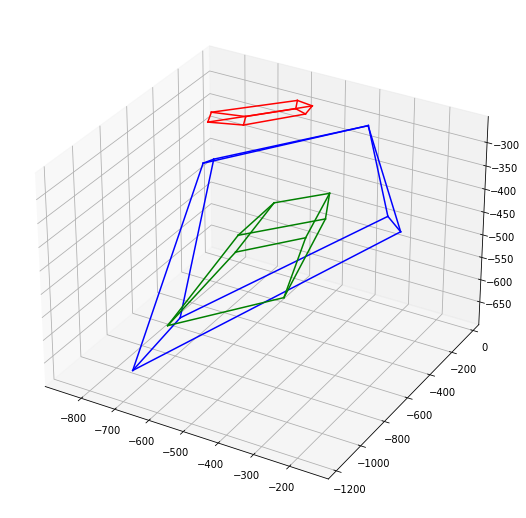

In [249]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

def plot_line_util(point1, point2, c, ax=ax):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    ax.plot3D(xs=[x1, x2], ys=[y1, y2], zs=[z1, z2], color=c)

def plot_line(orignum1, orignum2, c, ax=ax, coll=reconstructed_norm_mult):
    plot_line_util(coll[orignum1-1], coll[orignum2-1], c=c, ax=ax)

color = 'red'
plot_line(1, 2, c=color)
plot_line(2, 3, c=color)
plot_line(3, 4, c=color)
plot_line(4, 1, c=color)
plot_line(5, 6, c=color)
plot_line(6, 7, c=color)
plot_line(7, 8, c=color)
plot_line(8, 5, c=color)
plot_line(1, 5, c=color)
plot_line(2, 6, c=color)
plot_line(3, 7, c=color)
plot_line(4, 8, c=color)

color = 'blue'
plot_line(17, 18, c=color)
plot_line(18, 19, c=color)
plot_line(19, 20, c=color)
plot_line(20, 17, c=color)
plot_line(21, 22, c=color)
plot_line(22, 23, c=color)
plot_line(23, 24, c=color)
plot_line(24, 21, c=color)
plot_line(17, 21, c=color)
plot_line(18, 22, c=color)
plot_line(19, 23, c=color)
plot_line(20, 24, c=color)

color = 'green'
plot_line(9, 10, c=color)
plot_line(10, 11, c=color)
plot_line(11, 12, c=color)
plot_line(12, 9, c=color)
plot_line(13, 14, c=color)
plot_line(14, 15, c=color)
plot_line(15, 16, c=color)
plot_line(16, 13, c=color)
plot_line(9, 13, c=color)
plot_line(10, 14, c=color)
plot_line(11, 15, c=color)
plot_line(12, 16, c=color)

fig.show()

